In [21]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parámetros
gamma = 1.0       # Tasa de detección
phi = 0.0         # Fase del oscilador local
t_max = 200
dt =  0.02                 # Tiempo total de simulación
Omega = 6         # Frecuencia de Rabi
steps = int(t_max / dt)
Delta = 0

# Operadores cuánticos
sm = qt.destroy(2)   # sigma_-
sp = sm.dag()        # sigma_+
sigma_phi = (sp * np.exp(1j * phi) + sm * np.exp(-1j * phi)) / 2  # Operador de cuadratura

Kg = qt.basis(2, 0)  # Estado base |g⟩
Ke = qt.basis(2, 1)  # Estado excitado |e⟩
sigma_z = Ke * Ke.dag() - Kg * Kg.dag()

# Hamiltoniano
H = 0.5 * Delta * qt.sigmaz() + 0.5 * Omega * (sm + sp)

# Estado inicial en superposición
psi_0 = (qt.basis(2, 0) + qt.basis(2, 1)).unit()

# Función para evolucionar el estado con ruido
def evolve_state(psi, dW_i):
    # Valores esperados
    sigma_plus_expect = qt.expect(sp, psi)
    sigma_minus_expect = qt.expect(sm, psi)
    
    # Fotocorriente I_W^c(t) con ruido
    I_W_t = gamma * (sigma_plus_expect + np.exp(-2j * phi) * sigma_minus_expect) + np.exp(-1j * phi) * np.sqrt(gamma) * (dW_i / dt)
    
    # Evolución del estado estocástica
    dPsi = (-1j * H * psi + I_W_t * sm * psi + np.sqrt(gamma) * dW_i * sm * psi) * dt
    return (psi + dPsi).unit(), I_W_t

# Simulación de trayectorias
num_trayectorias = 1000  # Número de trayectorias
IWsum = []  

expect_smsum= []
expect_spsum= []

for tj in range(num_trayectorias):
    dW = np.sqrt(dt) * np.random.randn(steps)  # Incrementos de Wiener
    I_W = []
    expect_X = []
    expect_sm=[]
    expect_sp=[]
    psi_t = psi_0
    for i in range(steps):
        psi_t, I_W_t = evolve_state(psi_t, dW[i])
        #expect_X.append(qt.expect(sigma_phi, psi_t))
       
        I_W.append(I_W_t)
        
    expect_smsum.append(expect_sm)
  
    IWsum.append(I_W)

# Promedio de las trayectorias
IWavg0 = np.mean(IWsum, axis=0)
#expect_Xavg = np.mean(expect_Xsum, axis=0)





In [ ]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parámetros
gamma = 1.0       # Tasa de detección
phi = np.pi/2        # Fase del oscilador local
t_max = 100
dt =  0.02                 # Tiempo total de simulación
Omega = 3         # Frecuencia de Rabi
steps = int(t_max / dt)
Delta = 0

# Operadores cuánticos
sm = qt.destroy(2)   # sigma_-
sp = sm.dag()        # sigma_+
sigma_phi = (sp * np.exp(1j * phi) + sm * np.exp(-1j * phi)) / 2  # Operador de cuadratura

Kg = qt.basis(2, 0)  # Estado base |g⟩
Ke = qt.basis(2, 1)  # Estado excitado |e⟩
sigma_z = Ke * Ke.dag() - Kg * Kg.dag()

# Hamiltoniano
H = 0.5 * Delta * qt.sigmaz() + 0.5 * Omega * (sm + sp)

# Estado inicial en superposición
psi_0 = (qt.basis(2, 0) + qt.basis(2, 1)).unit()

# Función para evolucionar el estado con ruido
def evolve_state(psi, dW_i):
    # Valores esperados
    sigma_plus_expect = qt.expect(sp, psi)
    sigma_minus_expect = qt.expect(sm, psi)
    
    # Fotocorriente I_W^c(t) con ruido
    I_W_t = gamma * (sigma_plus_expect + np.exp(-2j * phi) * sigma_minus_expect) + np.exp(-1j * phi) * np.sqrt(gamma) * (dW_i / dt)
    
    # Evolución del estado estocástica
    dPsi = (-1j * H * psi + I_W_t * sm * psi + np.sqrt(gamma) * dW_i * sm * psi) * dt
    return (psi + dPsi).unit(), I_W_t

# Simulación de trayectorias
num_trayectorias = 1000  # Número de trayectorias
IWsum = []  

expect_smsum= []
expect_spsum= []

for tj in range(num_trayectorias):
    dW = np.sqrt(dt) * np.random.randn(steps)  # Incrementos de Wiener
    I_W = []
    expect_X = []
    expect_sm=[]
    expect_sp=[]
    psi_t = psi_0
    for i in range(steps):
        psi_t, I_W_t = evolve_state(psi_t, dW[i])
        #expect_X.append(qt.expect(sigma_phi, psi_t))
       
        I_W.append(I_W_t)
        
    expect_smsum.append(expect_sm)
  
    IWsum.append(I_W)

# Promedio de las trayectorias
IWavgPimed = np.mean(IWsum, axis=0)
#expect_Xavg = np.mean(expect_Xsum, axis=0)





In [ ]:
# Calcular la FFT de la fotocorriente
IW_fft = np.fft.fft(IWavg0)  # Transformada de Fourier
freqs = np.fft.fftfreq(len(IWavg0), d=dt)  # Frecuencias

# Centramos el espectro en f = 0
IW_fft_shifted = np.fft.fftshift(IW_fft)
freqs_shifted = np.fft.fftshift(freqs)

# Potencia espectral (Densidad espectral)
spectro0 = np.abs(IW_fft_shifted)**2  



In [ ]:
# Calcular la FFT de la fotocorriente
IW_fft = np.fft.fft(IWavgPimed)  # Transformada de Fourier
freqs = np.fft.fftfreq(len(IWavgPimed), d=dt)  # Frecuencias

# Centramos el espectro en f = 0
IW_fft_shifted = np.fft.fftshift(IW_fft)
freqs_shifted = np.fft.fftshift(freqs)

# Potencia espectral (Densidad espectral)
spectroPimed = np.abs(IW_fft_shifted)**2  


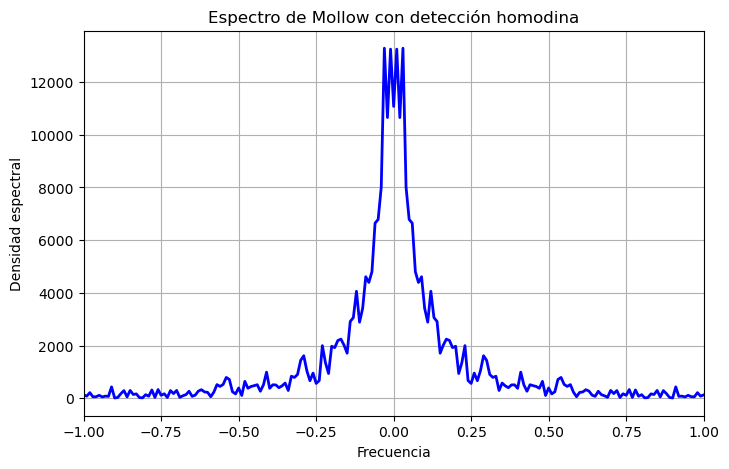

In [22]:
# Graficamos el espectro completo
plt.figure(figsize=(8, 5))
plt.plot(freqs_shifted, spectro0, color='blue', linewidth=2)
#plt.plot(freqs_shifted, spectroPimed, color='red', linewidth=2)
plt.xlabel("Frecuencia")
plt.ylabel("Densidad espectral")
plt.title("Espectro de Mollow con detección homodina")
plt.xlim(-1, 1)  # Ajustamos el rango de frecuencias
#plt.ylim(0, 10000)
plt.grid(True)
plt.show()